In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
campaign.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [7]:
campaign.shape

(37069, 20)

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [97]:
campaign['poutcome'] = campaign['poutcome'].astype('category')
campaign['out'] = campaign['poutcome'].cat.codes

features = ['out', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'previous','campaign']


campaign['y'] = campaign['y'].astype('category')
campaign['y_encoded'] = campaign['y'].cat.codes


In [98]:
X = campaign[features]
y = campaign['y_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("Training Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

print("--------------------------------")
print("Training Y-Value Counts")
print(y_train.value_counts())

Training Shape: (29655, 6)
Test Shape: (7414, 6)
--------------------------------
Training Y-Value Counts
0    26315
1     3340
Name: y_encoded, dtype: int64


In [99]:
params_dict = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

from sklearn.model_selection import GridSearchCV


# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)




In [100]:
sdt = DecisionTreeClassifier()
grid = GridSearchCV(sdt, params_dict, cv=10)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

print("Best Score:", grid.best_score_)


Best Parameters: {'max_depth': 5}
Best Score: 0.8994100081985948


/Users/sulavdahal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


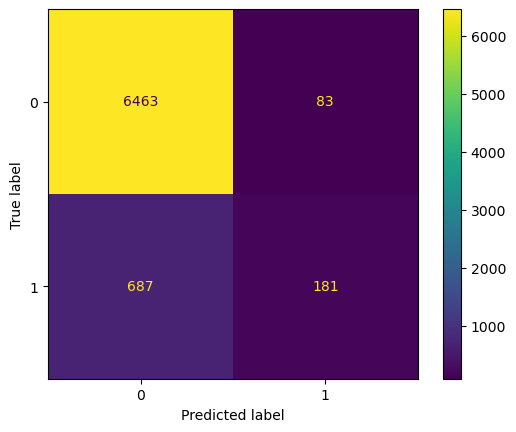

In [101]:
y_pred = grid.predict(X_test)
y_pred_train = grid.predict(X_train)
matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(grid, X_test, y_test)



In [104]:
#Convert Pandas DataFrame to Numpy Array
X_train_n = X_train.to_numpy()
y_train_n = y_train.to_numpy()

X_test_n = X_test.to_numpy()
y_test_n = y_test.to_numpy()


/Users/sulavdahal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


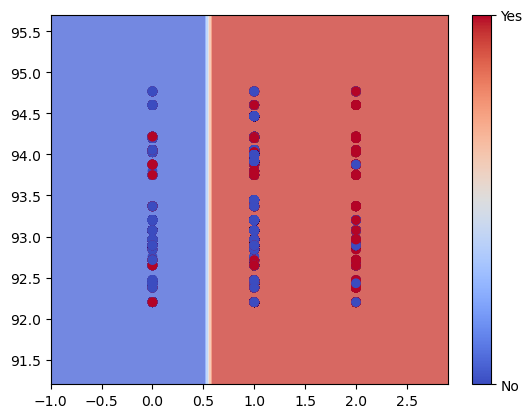

In [110]:
def plot_decision_boundary(feature, target):
# create a grid of points to plot the decision regions
    x_min, x_max = feature[:, 0].min() - 1, feature[:, 0].max() + 1
    y_min, y_max = feature[:, 1].min() - 1, feature[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    # predict the class labels for the points in the grid
    Z = grid.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], 4))])
    Z = Z.reshape(xx.shape)

    # plot the decision regions

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(feature[:, 0], feature[:, 1], c=target, cmap=plt.cm.coolwarm)
    cb = plt.colorbar()
    cb.set_ticks([0, 1])
    cb.set_ticklabels(['No', 'Yes'])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

plot_decision_boundary(X_train_n, y_train_n)

/Users/sulavdahal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


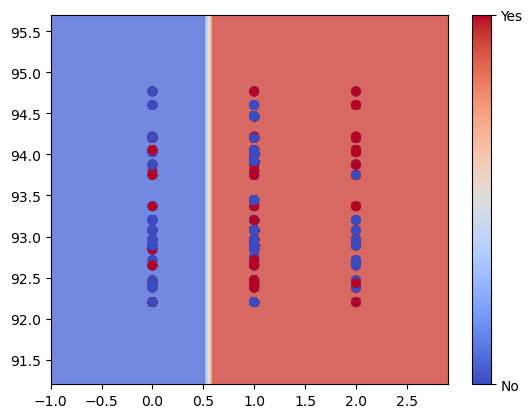

In [108]:
plot_decision_boundary(X_test_n, y_test_n)